# Chapter 6. Decision Tree

## 6.1 결정 트리 학습과 시각화

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [4]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

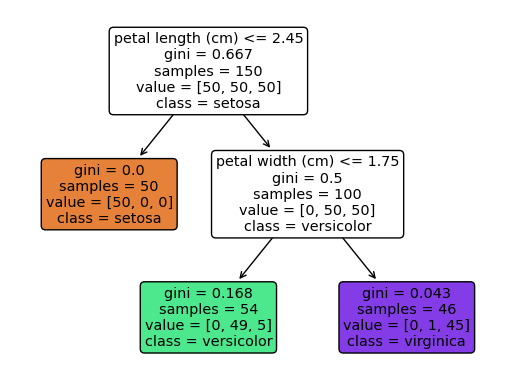

In [5]:
plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

## 6.2 예측하기

결정 트리의 장점은 데이터 전처리가 거의 필요하지 않다는 것!
스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않다.

- sample: 각 노드로 분류된 샘플의 개수
- value: 각 노드로 분류된 샘플의 실제 레이블 별 개수
- gini: 불순도, $G_i=1-\sum_{i=1}^np_{i,k}^2$

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def plot_decision_boundary(clf, X, y, axis, plot_training=True):
    x1s = np.linspace(axis[0], axis[1], 100)
    x2s = np.linspace(axis[2], axis[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_grid = np.c_[x1.ravel(), x2.ravel()]
    y_grid = clf.predict(X_grid).reshape(x1.shape)
    plt.contourf(x1, x2, y_grid, alpha=0.3)
    
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axis)

Text(0, 0.5, 'petal width')

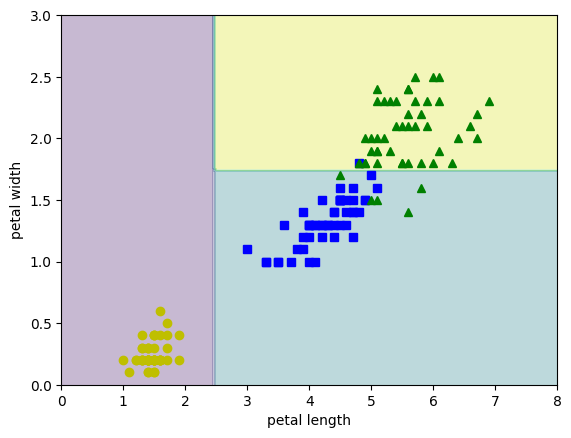

In [8]:
plot_decision_boundary(tree_clf, X, y, [0, 8, 0, 3])
    
plt.xlabel("petal length")
plt.ylabel("petal width")

## 6.3 클래스 확률 추정

In [9]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [10]:
tree_clf.predict([[5, 1.5]])

array([1])

## 6.4 CART 훈련 알고리즘

사이킷런에서는 CART 알고리즘을 사용해 트리를 훈련시킨다.

먼저 훈련 세트를 하나의 특성 k의 임곗값 $t_k$를 사용해 두 개의 subset으로 나눈다.   
이때, 가장 순수한 subset으로 나눌 수 있는 $(k, t_k)$ 짝을 찾는다.   

**분류에 대한 CART 알고리즘의 비용 함수**   
$J(k, t_k) = \dfrac{m_{left}}{m}G_{left} + \dfrac{m_{right}}{m}G_{right}$   
- $G_{left/right}$는 왼쪽/오른쪽 subset의 불순도
- $m_{left/right}$는 왼쪽/오른쪽 subset의 샘플 수

max_depth에 도달하거나 불순도를 줄이는 분할을 찾을 수 없을 때까지 계속 분할

## 6.5 계산 복잡도

- 탐색 시간 복잡도: $O(log_2(m))$
- 훈련 시간 복잡도: $O(nmlog_2(m))$

## 6.6 지니 불순도 또는 엔트로피?

**엔트로피 불순도**
$H_i = -\sum_{k=1,p_{i,k}\neq0}^np_{i,k}log_2(p_{i,k})$
- 지니 불순도: 계산이 조금 더 빠르기 때문에 기본값으로 좋다, 가장 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있다.
- 엔트로피: 조금 더 균형 잡힌 트리를 만든다.

## 6.7 규제 매개변수

- 비파라미터 모델: 훈련되기 전에 파라미터 수가 결정되지 않는다. 모델 구조가 데이터에 맞춰져서 고정되지 않고 자유롭다. 과대적합 되기 쉽다. ex) 결정 트리
- 파라미터 모델: 미리 정의된 모델 파라미터 수를 가진다. 자유도가 제한되고 과대적합될 위험이 줄어든다. ex) 선형 모델

결정 트리의 형태를 제한하는 매개 변수
- max_depth
- min_samples_split
- min_samples_leaf
- min_weight_fraction_leaf
- max_leaf_nodes
- max_features

## 6.8 회귀

In [11]:
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x1 <= 0.159\nsquared_error = 0.098\nsamples = 200\nvalue = 0.334'),
 Text(0.25, 0.5, 'x1 <= 0.085\nsquared_error = 0.02\nsamples = 33\nvalue = 0.73'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.005\nsamples = 16\nvalue = 0.849'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.009\nsamples = 17\nvalue = 0.617'),
 Text(0.75, 0.5, 'x1 <= 0.786\nsquared_error = 0.077\nsamples = 167\nvalue = 0.256'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.021\nsamples = 126\nvalue = 0.127'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.04\nsamples = 41\nvalue = 0.652')]

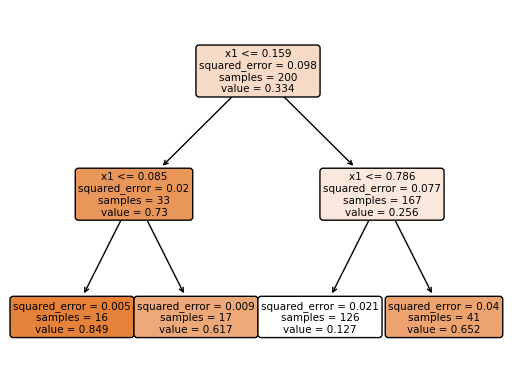

In [14]:
plot_tree(
        tree_reg,
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

In [15]:
def plot_tree_reg(reg, X, y, axis):
    X_grid = np.linspace(0, 1, 100).reshape(-1, 1)
    y_grid = reg.predict(X_grid)
    plt.plot(X_grid, y_grid, "g-")
    plt.plot(X, y, "b.")
    plt.axis([0, 1, -0.2, 1])

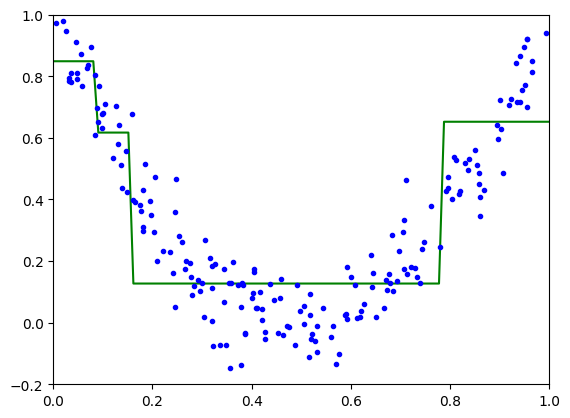

In [16]:
plot_tree_reg(tree_reg, X, y, [0, 1, -0.2, 1])

In [17]:
tree_reg1 = DecisionTreeRegressor(max_depth=3)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=3)

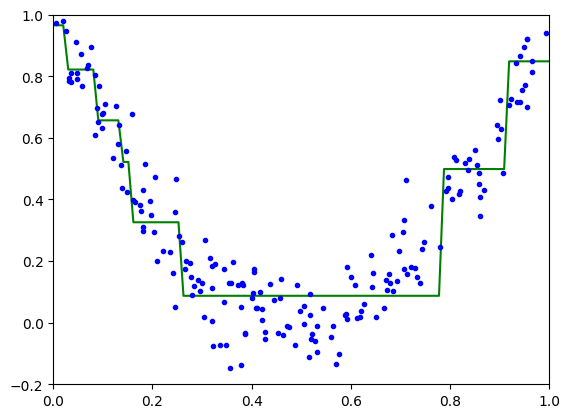

In [18]:
plot_tree_reg(tree_reg1, X, y, [0, 1, -0.2, 1])

In [19]:
tree_reg2 = DecisionTreeRegressor()
tree_reg2.fit(X, y)

DecisionTreeRegressor()

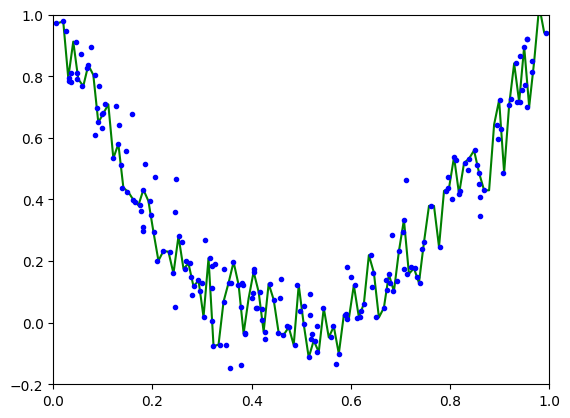

In [20]:
plot_tree_reg(tree_reg2, X, y, [0, 1, -0.2, 1])

**회귀에서의 CART 알고리즘**    
$J(k,t_k) = \dfrac{m_{left}}{m}MSE_{left}+\dfrac{m_{right}}{m}MSE_{right}$   
$where, MSE_{node}=\frac{1}{m_{node}}\sum_{i\in node}(\hat{y}_{node}-y^{(i)})^2, 
\hat{y}_{node} = \dfrac{1}{m_{node}}\sum_{i\in node}y^{(i)}$

## 6.9 불안정성

**결정 트리의 제한 사항**
- 모든 분할은 축에 수직이다
- 따라서 데이터셋의 회전에 민감하다
- 또한, 데이터에 있는 작은 변화에도 매우 민감하여, 크게 다른 노드 분할을 만든다.

## 연습문제

In [23]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [24]:
X, y = make_moons(n_samples=1000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.model_selection import GridSearchCV

In [33]:
tree_clf = DecisionTreeClassifier()
params = [
    {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
]
grid_clf = GridSearchCV(tree_clf, params)

In [34]:
grid_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 16, 17, 18, 19, 20, 21,
                                             22, 23, 24, 25, 26, 27, 28, 29, 30,
                                             31, ...],
                          'min_samples_split': [2, 3, 4]}])

In [35]:
grid_clf.best_params_

{'max_leaf_nodes': 7, 'min_samples_split': 2}

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
best_tree_clf = DecisionTreeClassifier(max_leaf_nodes=7, min_samples_split=2)
best_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=7)

In [38]:
y_pred = best_tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.845